<a href="https://colab.research.google.com/github/yoonlee78/transfomer-lm/blob/master/week1/01_Quick_Introduction_SpaCy_and_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Analysis - Basic

If you want to know more about Text Mining and Analysis, check out my github: https://github.com/yoonlee78/textmining (but this version does not use SpaCy)

### 1. Data Cleaning and Preprocessing


#### 1.1. English

#### 1.1.1. Tokenization
#### 1.1.2. Stopwords
#### 1.1.3. Stemming/Lemmatization
#### 1.1.4. POS tagging


#### 1.2. Korean

#### 1.2.1. Tokenization (=> 한글용 형태소 분석기 사용)
#### 1.2.2. Stopwords (=> 형태소 분석기, 또는 사전 추가)
#### 1.2.3. Stemming/Lemmatization (=> 형태소 분석기 안에 있는 문법 또는 사전 추가)
#### 1.2.4. POS tagging (=> 형태소 분석기)

한글 텍스트 처리 라이브러리:

KonlPy, Soynlp, Mecab ..

형태소 분석기:

한나눔, 꼬꼬마, soynlp, mecab-ko.

We are using Mecab-ko in this session

## 시각화 도구 

런타임 재시작해야해서 미리 설정

구글 Colab에서 한글 문제 대응하기:

[link 1](https://pinkwink.kr/1255)I [link 2](https://rasahq.github.io/whatlies/) | [link 3](https://spacy.io/universe/project/whatlies)

In [1]:
# -- 한글폰트 지원을 위한 설치
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144379 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# -- 여기까지 하고 런타임 재시작 후 아래 실행.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 

mpl.font_manager._rebuild()

In [2]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자

!python --version

def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['NanumBarunGothic'], 설정 폰트 사이즈: 10.0


### SpaCy 

*spaCy 101*: Everything you need to know - https://spacy.io/usage/spacy-101

#### Installation 

In [ ]:
# 처음 설치용
#!pip install -U spacy

In [ ]:
#!python -m spacy download en_core_web_sm
#!spacy download en > /dev/null 2>&1 # english model


## Models & Languages

https://spacy.io/usage/models


```!spacy download en > /dev/null 2>&1 #english model```

```!spacy download de > /dev/null 2>&1 # german model```

```!spacy download es > /dev/null 2>&1 # spanish model```

```!spacy download fr > /dev/null 2>&1 # french model```

```!spacy download xx > /dev/null 2>&1 # multi-language model```

``` # download best-matching version of specific model for your spaCy installation
!spacy download en_core_web_sm > /dev/null 2>&1 ```

#### import

In [3]:
import spacy

In [4]:
nlp = spacy.load('en')

doc = nlp(u'This is a sentence.')

for token in doc:
    print(token.text, token.pos_, token.tag_)

This DET DT
is AUX VBZ
a DET DT
sentence NOUN NN
. PUNCT .


In [5]:
#Tokenization
doc = nlp(u'I am flying to Frisco') #container for a sequence of Token objects

In [6]:
print([w.text for w in doc]) #only print out text content of each token

['I', 'am', 'flying', 'to', 'Frisco']


In [7]:
#lemmatization is an important step in the task of meaning recognition

doc = nlp(u'this product integrates both libraries for dowloading and applying patches')

for token in doc:
    print(token.text, token.lemma_)

this this
product product
integrates integrate
both both
libraries library
for for
dowloading dowloade
and and
applying apply
patches patch


adding dictionary to lemmatization

In [8]:
#applying lemmatization for meaning recognition
import spacy
from spacy.symbols import ORTH, LEMMA
nlp = spacy.load('en')
doc = nlp(u'I am flying to Frisco')

#lemmatization from here
special_case = [{ORTH:u'Frisco',LEMMA:u'San Francisco'}]
nlp.tokenizer.add_special_case(u'Frisco',special_case)

### Part-of-speech tagging

a part-of-speech tag tells you the part-of-speech (noun, verb, and so on) of a given word in a given sentence.

“In spaCy, part-of-speech tags can include detailed information about a token. In the case of verbs, they might tell you the following features: tense (past, present, or future), aspect (simple, progressive, or perfect), person (1st, 2nd, or 3rd), and number (singular or plural)”

Excerpt From: Yuli Vasiliev. “Natural Language Processing with Python and spaCy.” iBooks.

In [ ]:
print([w.lemma_ for w in nlp(u'I have flown to LA. Now I am flying to Frisco')])

['-PRON-', 'have', 'fly', 'to', 'LA', '.', 'now', '-PRON-', 'be', 'fly', 'to', 'San Francisco']


lemmatization isn't enough here. The application might consider the first 'fly', 'LA' as user intent.

The SpaCy offers 'fine-grained parts of speech' tags : morphological features like verb tenses and types of pronouns.

``` 

Token.tag

Token.-tag_(unicode)

```

You can find the entire list of fine-grained POS-tags here => https://spacy.io/api/annotation#pos-tagging

In [ ]:
#only infinitives have intent

import spacy

nlp=spacy.load('en')

doc=nlp(u'I have flown to LA. Now I am flying to Frisco')

print([w.text for w in doc if w.tag_=='VBG' or w.tag_ =='VB'])

#tag_ contains pos-tagger
#loop performed to check each token has the assigned tag (here 'VBG or VB)
#the result spits out the one fits the criteria.

['flying']


If you want to check tokens with different tags,

In [ ]:
print([w.text for w in doc if w.pos_ =='PROPN']) #PROPN = proper nouns like names

['LA', 'Frisco']


#### _[실습]_ 명사(NNG)를 추출해보세요

## 한국어

Google Drive Mount

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


ls, cd 를 써서 경로에 /gdrive/가 있는지 확인하세요

In [16]:
%ls

gdrive/  sample_data/


In [15]:
cd /content/

/content


Mecab


In [17]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [18]:
%cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [19]:
!bash install_mecab-ko_on_colab190912.sh #konlpy를 같이 설치해줌

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
     |████████████████████████████████| 3.6MB 54.3MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-07-08 10:24:03--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.1, 18.205.93.0, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?

In [20]:
#Load Mecab

from konlpy.tag import Mecab

mecab = Mecab()

SpaCy

In [ ]:
#!pip install -U spacy 

In [21]:
# 한글 모델에 필요한 디펜던시 "> > /dev/null 2>&1 은 없어도 됩니다"
!pip install natto-py > /dev/null 2>&1

In [23]:
import spacy 
from spacy.lang.ko import Korean
spacy.__version__

'2.2.4'

In [24]:
nlp = Korean()

doc = nlp(u'이것은 문장이다') #Creates a Doc object 

for token in doc:
    print(token.text, token.pos_, token.tag_) #prints the text and POS 

이것 PRON NP
은 ADP JX
문장 NOUN NNG
이 ADP VCP
다 X EC


In [25]:
#variable = nlp(u'your-sentence-here')
#or 
#variable = nlp(your-document-name/variable-here)

## SpaCy & Word2Vec

참고

- spaCy official doc. Word Vectors and Semantic Similarity: [link](https://spacy.io/usage/vectors-similarity)

- how to obtain word vectors using gensim [link](https://radimrehurek.com/gensim/models/keyedvectors.html)

- 딥러닝을 이용한 자연어처리 입문 - 영어/한국어 Word2Vec 실습 (WikiDocs) [link](https://wikidocs.net/50739)

- Pre-trained word vectors of 30+ languages [link](https://github.com/Kyubyong/wordvectors)



github에 저장해둔 ko.zip 압축 해제

In [37]:
! git clone https://github.com/yoonlee78/spacy.git

fatal: destination path 'spacy' already exists and is not an empty directory.


In [38]:
ls

images/  install_mecab-ko_on_colab190912.sh  LICENSE  README.md  spacy/


In [40]:
cd spacy

/content/Mecab-ko-for-Google-Colab/spacy


In [41]:
cd ko_wv

/content/Mecab-ko-for-Google-Colab/spacy/ko_wv


In [42]:
!unzip ko.zip

Archive:  ko.zip
  inflating: ko.bin                  
  inflating: ko.tsv                  


gensim

In [43]:
import gensim

In [44]:
model = gensim.models.Word2Vec.load('ko.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


아래 메세지가 나오면 정상임

``` 
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL

```

In [45]:
kv = model.wv

In [46]:
kv.save_word2vec_format('ko_wv.embd', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [47]:
ls

ko.bin  ko.tsv  ko_wv.embd  ko.zip


In [48]:
!python -m spacy init-model ko ko_wv.spacy.embd --vectors-loc ko_wv.embd

✔ Successfully created model
30185it [00:01, 17852.73it/s]
✔ Loaded vectors from ko_wv.embd
✔ Sucessfully compiled vocab
30185 entries, 30185 vectors


In [49]:
ls

ko.bin  ko.tsv  ko_wv.embd  ko_wv.spacy.embd/  ko.zip


In [50]:
ls ko_wv.spacy.embd

meta.json  vocab/


만들어진 모델 로드해서 사용

In [51]:
nlp_ko_wv = spacy.load('ko_wv.spacy.embd')

In [52]:
doc1 = nlp_ko_wv('안녕')

In [53]:
doc2 = nlp_ko_wv('잘가')

In [54]:
doc3 = nlp_ko_wv('안녕하세요')

In [55]:
doc4 = nlp_ko_wv('아이폰')

In [56]:
doc5 = nlp_ko_wv('아이패드')

In [57]:
doc6 = nlp_ko_wv('이어폰')

In [58]:
doc1.similarity(doc1)

1.0

In [59]:
doc1.similarity(doc2)

0.03725321592693812

In [60]:
doc1.similarity(doc3)

0.3767422436269971

In [61]:
doc4.similarity(doc6)

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)


0.0

시각화

도구

In [62]:
from sklearn.decomposition import PCA

In [63]:
import matplotlib.pyplot as plt

In [64]:
def get_word_vectors(words, nlp):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

In [70]:
words = ['개','고양이','개냥이','야옹이','이어폰','아이폰','아이패드','갤럭시','스마트폰','컴퓨터', '학교', '스트레스', '행복', '기쁨', '즐거움', '고민', '돈', '기차', '지하철']


In [71]:
pca = PCA(n_components=2)

In [72]:
word_vecs_2d = pca.fit_transform(get_word_vectors(words, nlp_ko_wv))

In [73]:
word_vecs_2d

array([[14.57007855, -9.43880781],
       [-0.96355486, -5.85603915],
       [ 4.63646455, -4.46683608],
       [-0.376104  ,  0.53556125],
       [ 0.14055373,  0.41421571],
       [-0.376104  ,  0.53556125],
       [-0.376104  ,  0.53556125],
       [ 0.17465924,  0.49294236],
       [-0.376104  ,  0.53556125],
       [ 3.65701918,  3.69864443],
       [ 4.03038864, 11.37489773],
       [-2.69239339,  1.16925018],
       [-7.52286159, -2.78101365],
       [-5.50634462, -1.93592272],
       [-4.5123368 , -1.78059068],
       [-5.07514975,  0.52137966],
       [-6.55677013, -3.3856842 ],
       [ 2.96219094,  2.55044152],
       [ 4.16247231,  7.2808777 ]])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


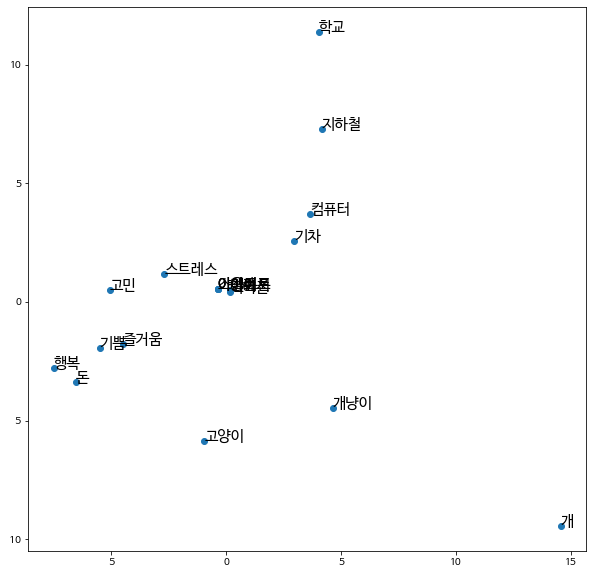

In [74]:
# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

In [75]:
from sklearn.manifold import TSNE

In [76]:
tsne = TSNE(n_components=2) 

word_vecs_2d_tsne = tsne.fit_transform(get_word_vectors(words, nlp_ko_wv))

In [77]:
word_vecs_2d_tsne

array([[-16.439545  ,  39.06877   ],
       [  0.08394334,  46.201206  ],
       [-28.837307  ,  63.548767  ],
       [-19.08608   ,  65.68438   ],
       [-23.135956  ,  56.07711   ],
       [ -1.5424757 ,  56.86366   ],
       [-14.883999  ,  56.651524  ],
       [-24.524134  ,  40.728138  ],
       [-26.222979  ,  48.492813  ],
       [ -4.022744  ,  35.44686   ],
       [-35.338036  ,  45.654186  ],
       [-33.477688  ,  55.107594  ],
       [ -8.738972  ,  51.13451   ],
       [-17.408194  ,  47.89215   ],
       [-32.58831   ,  36.289818  ],
       [ -9.117179  ,  63.83212   ],
       [-13.274817  ,  30.442745  ],
       [ -9.230633  ,  42.860912  ],
       [-23.479738  ,  31.06917   ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


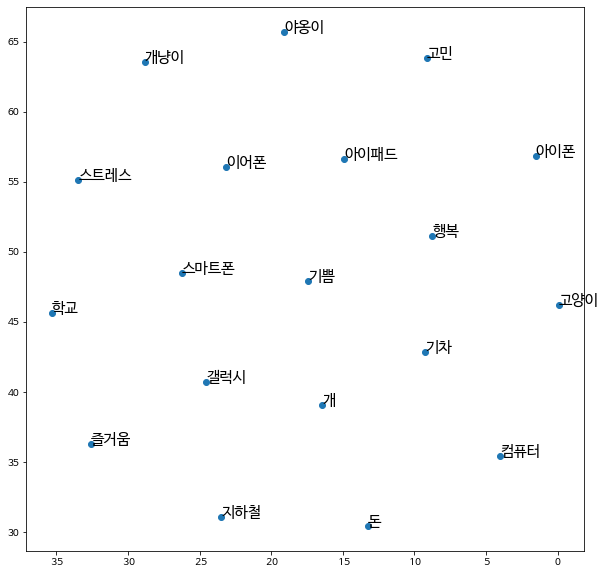

In [78]:
# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d_tsne[:,0], word_vecs_2d_tsne[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d_tsne):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

다음 시간:

Pretrained 한국어 FastText를 spaCy에서 사용하기